# Speech-based Emotion Recognition for Voice Comms.
## Script for batch data augmentation

In [74]:
import soundfile # read audio files
import numpy as np
import math
import librosa
import glob
import os
import matplotlib.pyplot as plt

class AugmentData:
    def read_audio_file(self, file_path):
        data = librosa.core.load(file_path, sr=None)[0]
        return data
    
    # generating new .wav files
    def write_audio_file(self, file, data, sample_rate=16000):
        librosa.output.write_wav(file, data, sample_rate)
    
    # example plots
    def plot_time_series(self, data):
        fig = plt.figure(figsize=(10, 4))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()
    
    # SNR augment(white noise generation)
    def add_noise(self, signal, snr):
        #RMS value of signal
        RMS_s=math.sqrt(np.mean(signal**2))
        #RMS values of noise
        RMS_n=math.sqrt(RMS_s**2/(pow(10,snr/20)))
        #Additive white gausian noise. Thereore mean=0
        #Because sample length is large (typically > 40000)
        #we can use the population formula for standard daviation.
        #because mean=0 STD=RMS
        STD_n=RMS_n
        noise=np.random.normal(0, STD_n, signal.shape[0])
        return noise
    
    # background noise (overlaying other voices, mechanical noise, etc.)
    # in examples we see random slices of background noise taken to overlay

    # reverb (decay time/wet level)
    # algorithmically apply reverb at different RT60 etc.

    # distortion/overdrive (clipping/nonlinear effects/mic emulation)
    # add cloned data with clipping

    # codec compression emulation (different bitrates, simulated cutouts)
    # simulate specs of compression algorithms

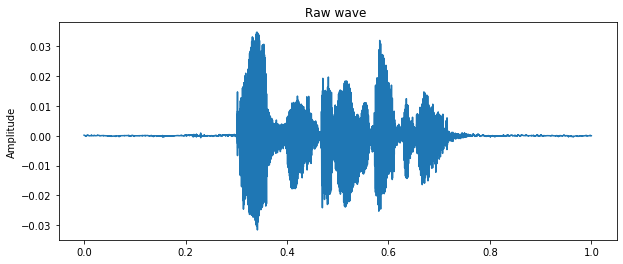

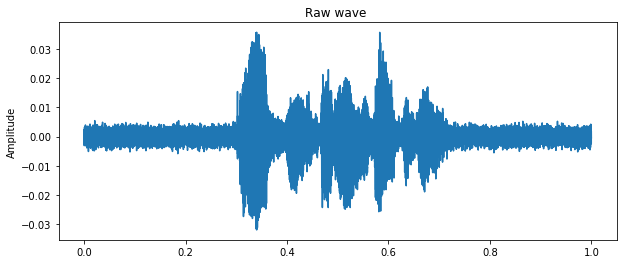

In [75]:
# Create a new instance of class
ad = AugmentData()

# Read and show cat sound
# RAVDESS
for file in glob.glob("data/RAVDESS/Actor_*/*.wav"):
    # get the base name of the audio file
    basename = os.path.basename(file)
    data = ad.read_audio_file(file)

    # Adding noise to sound
    data_noise = ad.add_noise(data, 20)
    newdata = data + data_noise
    
    # Write augmented soundfile
    ad.write_audio_file(os.path.join('data/augment-wn/RAVDESS', basename), newdata)
    
ad.plot_time_series(data)
ad.plot_time_series(newdata)

# # Shifting the sound
# data_roll = ad.shift(data)
# ad.plot_time_series(data_roll)

# # Stretching the sound
# data_stretch = ad.stretch(data, 0.8)
# ad.plot_time_series(data_stretch)